#Perkenalan

**Anggota Kelompok**:
1. Abdillah Halim Hanafi
2. Achmad Arga Bimantara Akbar
3. Dea Rishanti

**Dataset**:
- Jumlah data : 299
- sumber : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/code

**Objektif**:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


#Import module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kaggle_dataset/heart-failure/heart_failure_clinical_records_dataset.csv")

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


#EDA

In [ ]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.shape

(299, 13)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

##Visualization

###Histogram

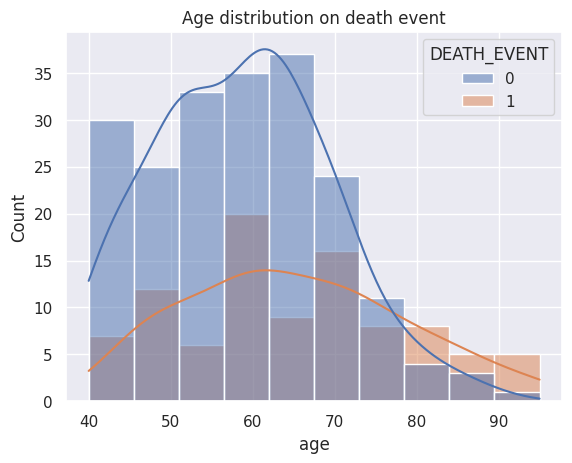

In [ ]:
sns.set(style="darkgrid")
sns.histplot(x="age", hue="DEATH_EVENT", data=df, kde=True)
plt.title("Age distribution on death event")
plt.show()

Histogram diatas menunjukkan jumlah contribusi dari variabel 'age' dengan variabel DEAT_EVEN

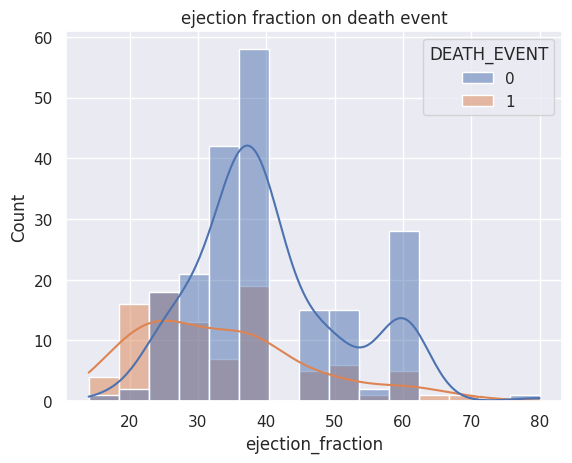

In [ ]:
sns.set(style="darkgrid")
sns.histplot(x="ejection_fraction", hue="DEATH_EVENT", data=df, kde=True)
plt.title("ejection fraction on death event")
plt.show()

Histogram diatas menunjukkan jumlah contribusi dari variabel ejection_fraction dengan variabel DEAT_EVENT

In [ ]:
categorical_list=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

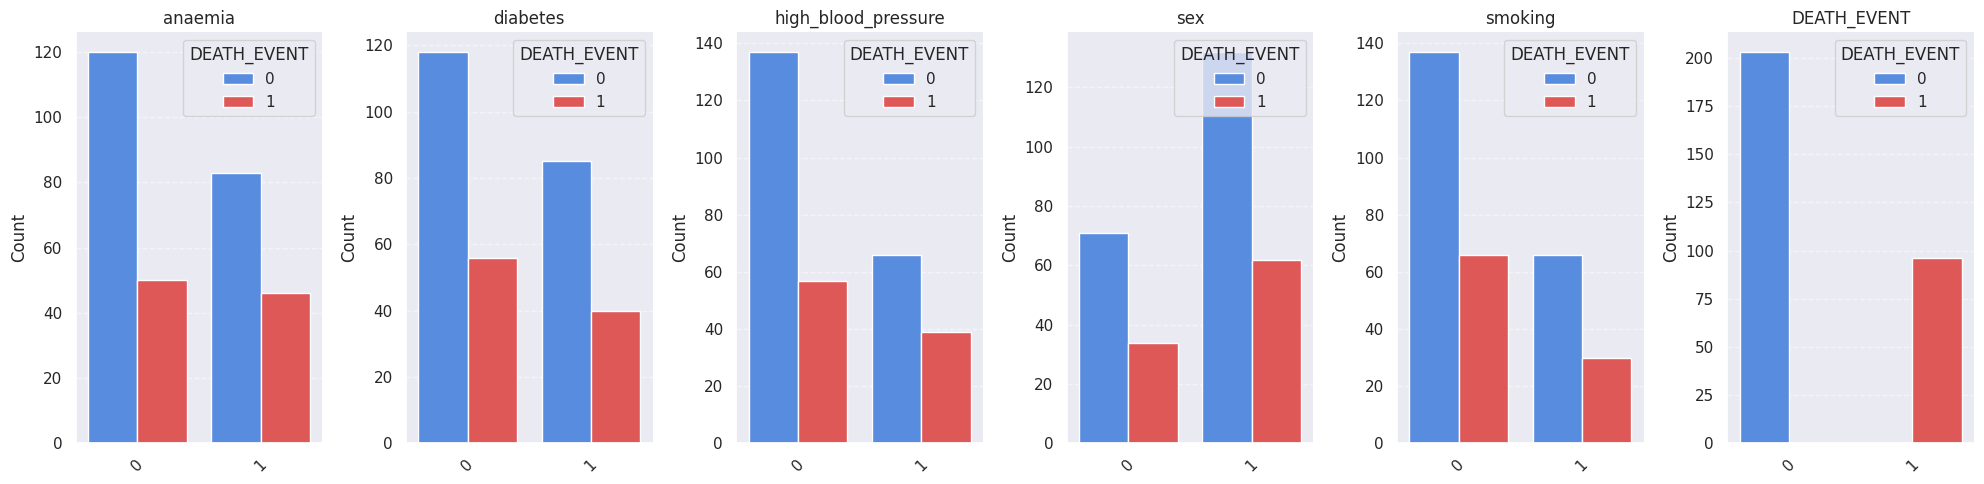

In [ ]:
fig, axs = plt.subplots(ncols=len(categorical_list), figsize=(20, 5))

data_categoric = df.loc[:, categorical_list]

colors = ["#4287f5", "#f54242"]

for i, col in enumerate(categorical_list):
    # Create countplot using Seaborn
    sns.countplot(x=col, data=data_categoric, hue="DEATH_EVENT", palette=colors, ax=axs[i])
    axs[i].set_title(col)

    sns.despine(ax=axs[i])
    axs[i].set_xlabel(None)
    axs[i].set_ylabel('Count')
    axs[i].legend(title='DEATH_EVENT')
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

Visualisasi diatas menunjukkan jumlah frekuensi dari variabel yang memiliki value 1/0

###Pairplott

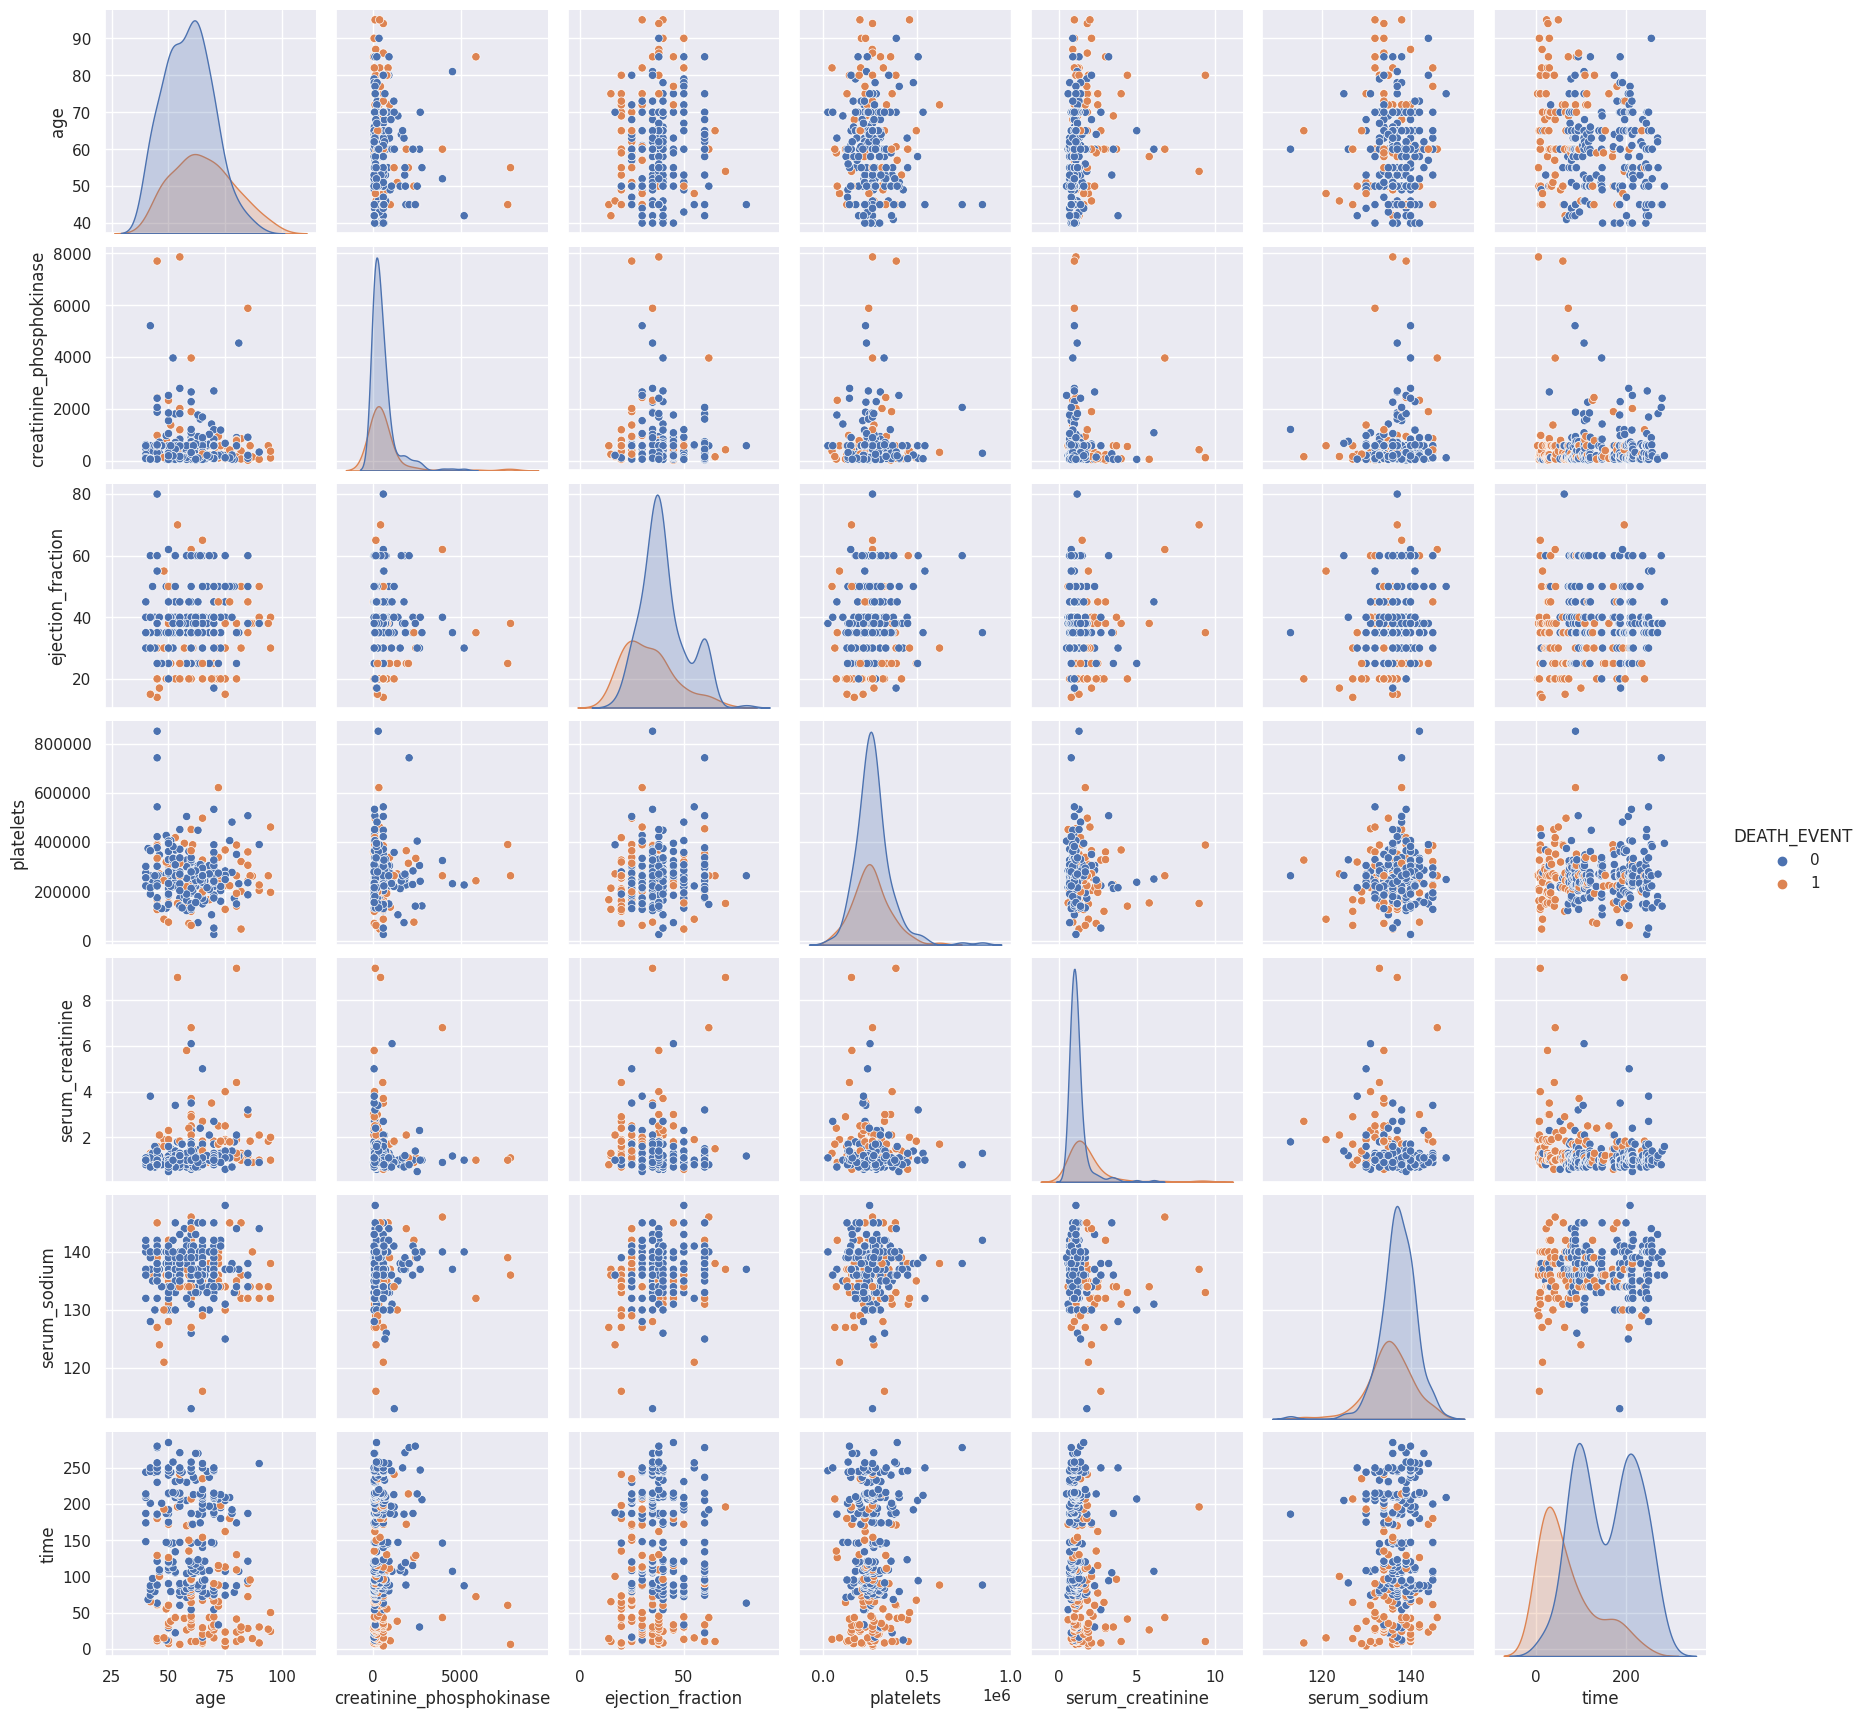

In [ ]:
sns.pairplot(data=df, vars=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium','time'], hue='DEATH_EVENT')
plt.show()

Visualiasi berikut adalah hubungan variabel 'DEATH_EVENT' dengan variabel 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium','time'

###Heatmap

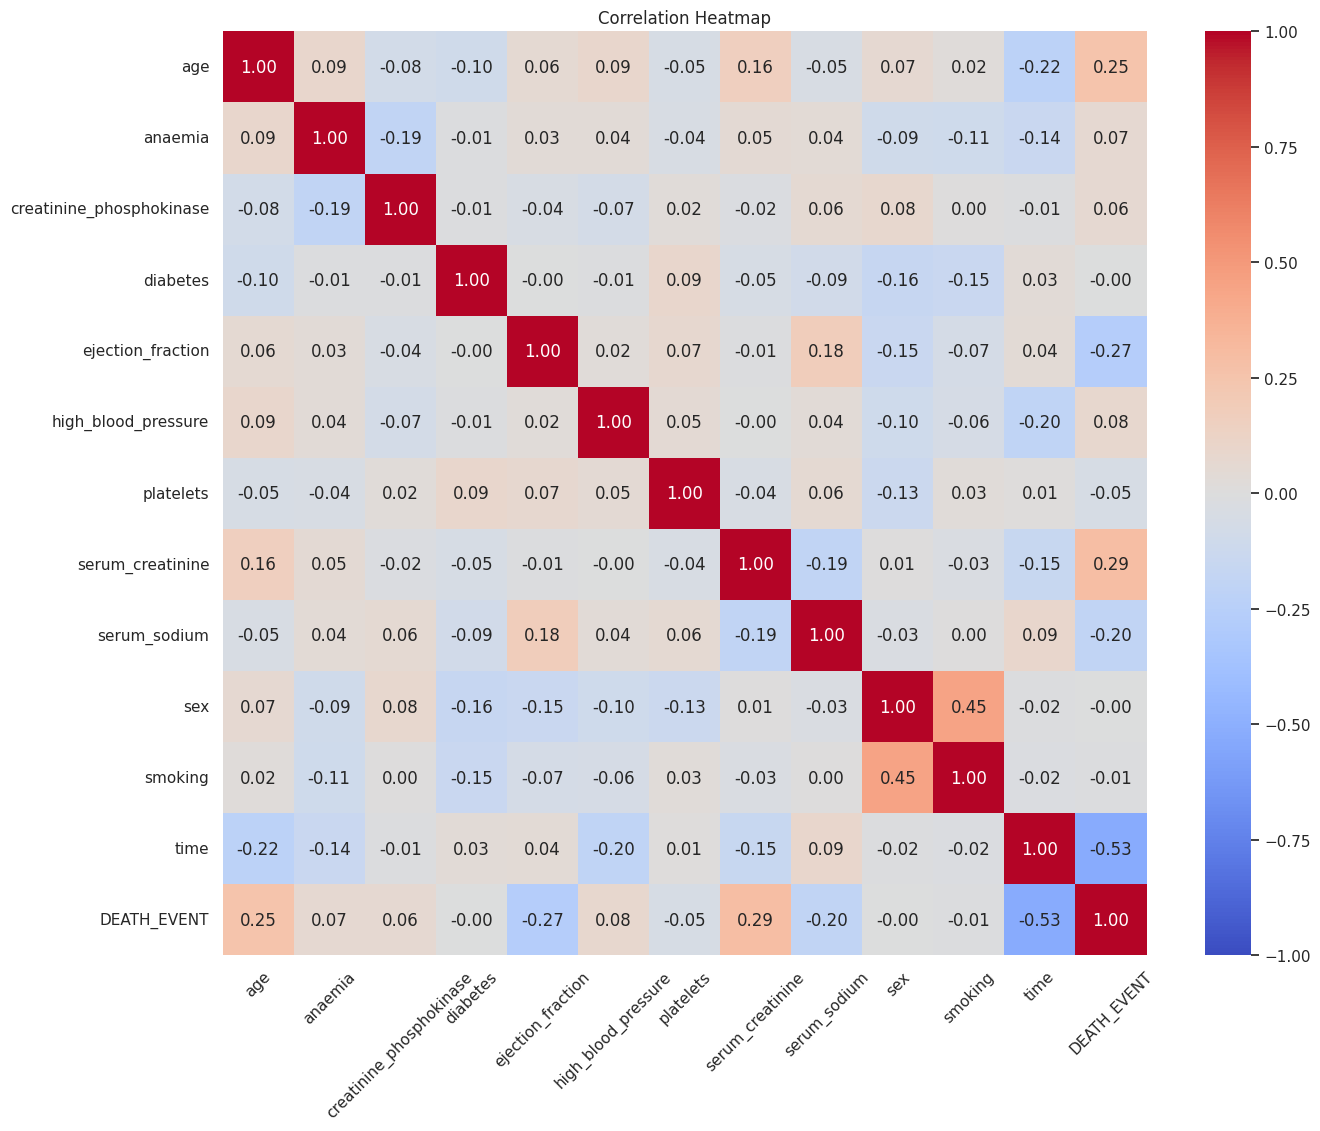

In [ ]:
plt.figure(figsize=(15, 12))

sns.heatmap(df.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm', square=True)

plt.title("Correlation Heatmap")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Heatmap menunjukkan korelasi antar variabel dengan variabel 'DEATH_EVENT'

##Checking na value

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dataset ini tidak memiliki na value

#Data Cleaning

In [ ]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)

##Outlier Handling


###Identify variable distribution

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
X_train['anaemia'].value_counts()

0    120
1     89
Name: anaemia, dtype: int64

In [ ]:
X_train['diabetes'].value_counts()

0    127
1     82
Name: diabetes, dtype: int64

In [ ]:
X_train['high_blood_pressure'].value_counts()

0    133
1     76
Name: high_blood_pressure, dtype: int64

In [ ]:
X_train['sex'].value_counts()

1    134
0     75
Name: sex, dtype: int64

In [ ]:
X_train['smoking'].value_counts()

0    141
1     68
Name: smoking, dtype: int64

Column diatas tidak perlu di identifikasi karena hanya memiliki nilai 1/0

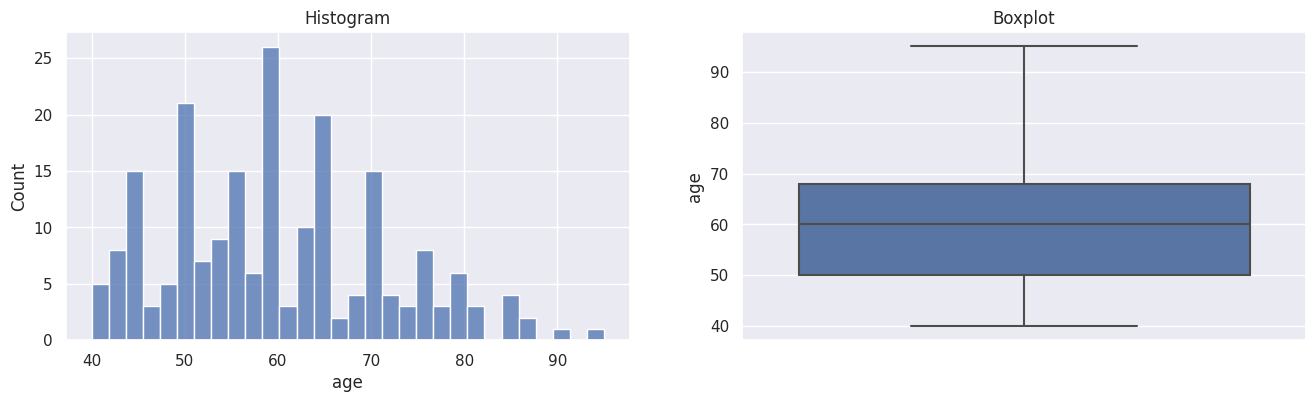

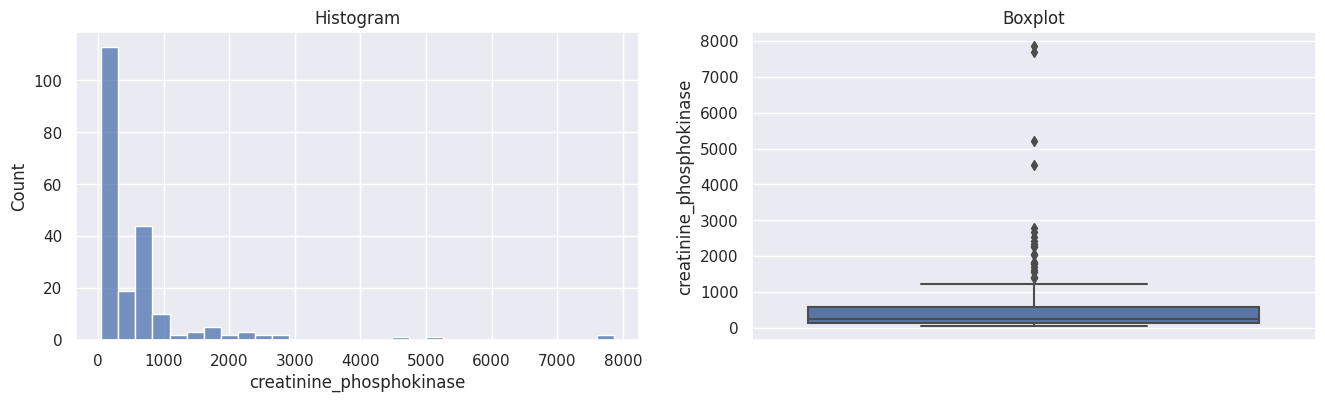

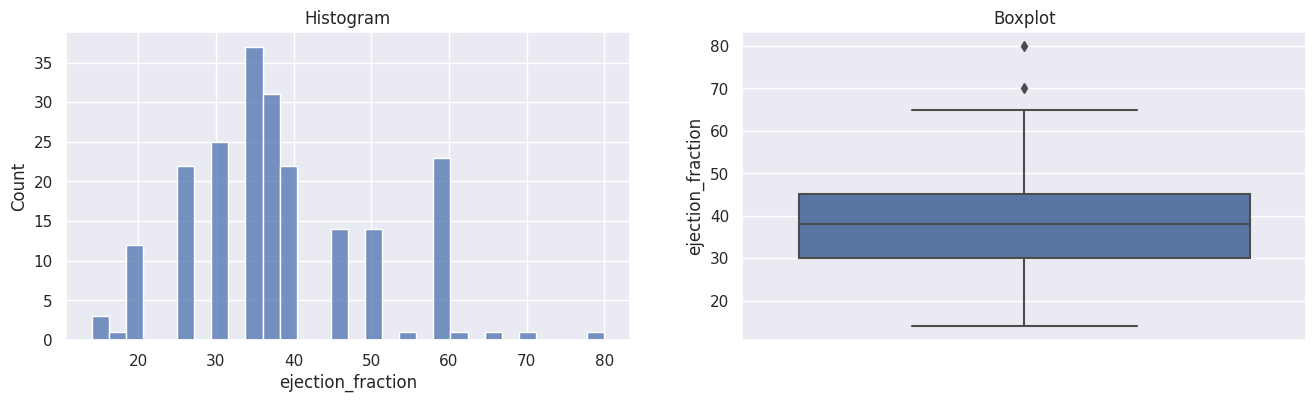

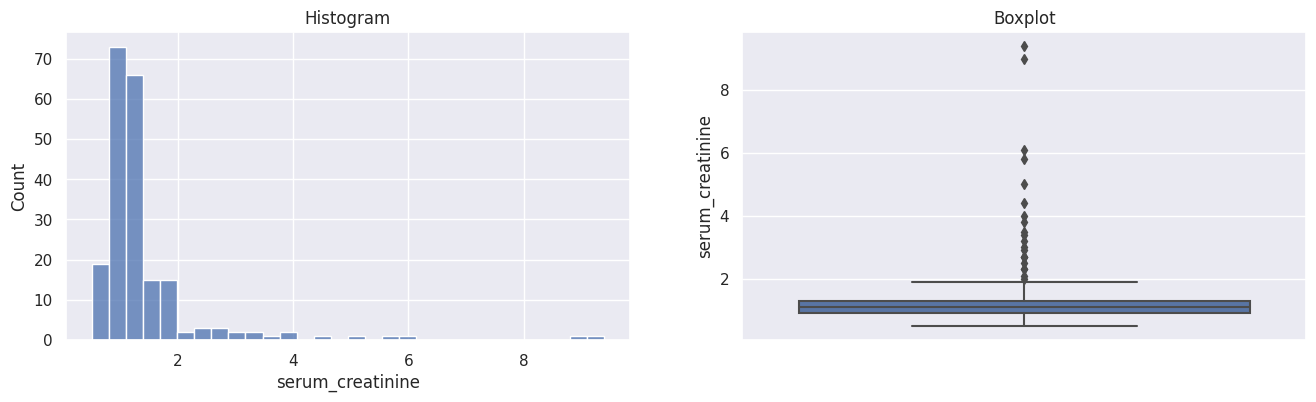

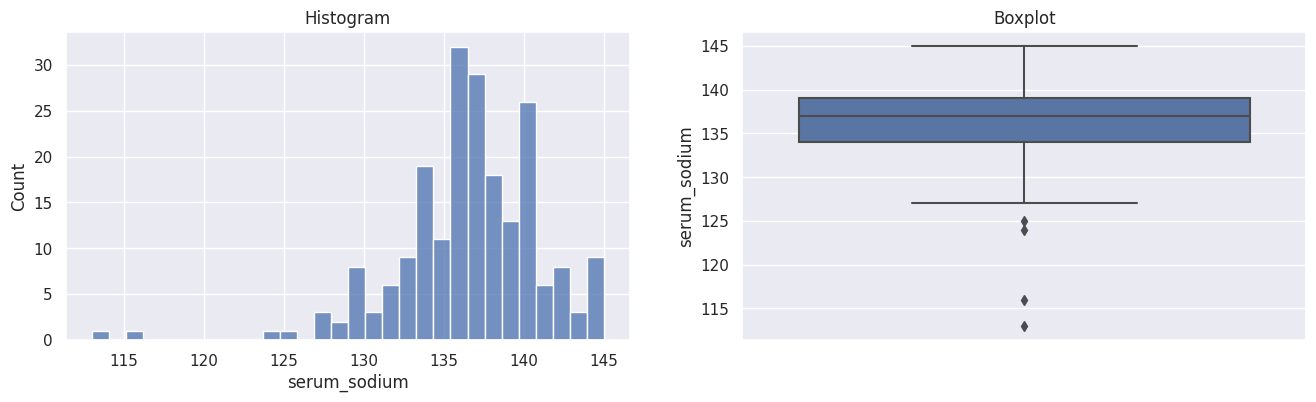

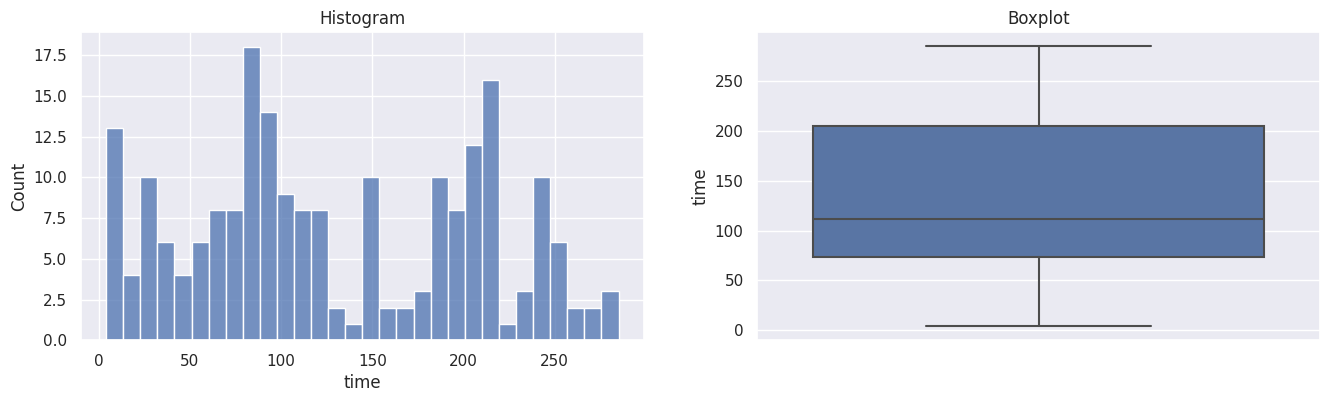

In [ ]:
diagnostic_plots(X_train, 'age')
diagnostic_plots(X_train, 'creatinine_phosphokinase')
diagnostic_plots(X_train, 'ejection_fraction')
diagnostic_plots(X_train, 'serum_creatinine')
diagnostic_plots(X_train, 'serum_sodium')
diagnostic_plots(X_train, 'time')

In [ ]:
print('age Skewness Value                         : ', X_train['age'].skew())
print('creatinine_phosphokinase Skewness Value    : ', X_train['creatinine_phosphokinase'].skew())
print('ejection_fraction Skewness Value           : ', X_train['ejection_fraction'].skew())
print('serum_creatinine Skewness Value            : ', X_train['serum_creatinine'].skew())
print('serum_sodium Skewness Value                : ', X_train['serum_sodium'].skew())
print('time Skewness Value                        : ', X_train['time'].skew())

age Skewness Value                         :  0.42738587061664973
creatinine_phosphokinase Skewness Value    :  4.774175421666965
ejection_fraction Skewness Value           :  0.6100052982802494
serum_creatinine Skewness Value            :  4.541248975457016
serum_sodium Skewness Value                :  -1.3660497299952594
time Skewness Value                        :  0.15890548589767328


###Outlier detection for Normally distributed variables

jika dilihat dari boxplot 'age' dan 'time' tidak memiliki Outlier,

In [ ]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
age_upper_boundary, age_lower_boundary = find_normal_boundaries(X_train, 'age')
age_upper_boundary, age_lower_boundary

time_upper_boundary, time_lower_boundary = find_normal_boundaries(X_train, 'time')
time_upper_boundary, time_lower_boundary

print('age upper limit  : ', age_upper_boundary)
print('age lower limit  : ', age_lower_boundary)
print('time upper limit : ', time_upper_boundary)
print('time lower limit : ', time_lower_boundary)

age upper limit  :  95.21723366168871
age lower limit  :  24.789149113430916
time upper limit :  361.6813187296849
time lower limit :  -102.59040963877581


In [ ]:
print('Total age: {}'.format(len(X_train)))
print('age with more than 95 (right end outliers) : {}'.format(len(X_train[X_train['age'] > age_upper_boundary])))
print('age with less than 24 (left end outliers.  : {}'.format(len(X_train[X_train['age'] < age_lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['age'] > age_upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['age'] < age_lower_boundary]) / len(X_train) * 100))

Total age: 209
age with more than 95 (right end outliers) : 0
age with less than 24 (left end outliers.  : 0

% right end outliers : 0.0
% left end outliers  : 0.0


In [ ]:
print('Total time: {}'.format(len(X_train)))
print('time with more than 95 (right end outliers) : {}'.format(len(X_train[X_train['time'] > time_upper_boundary])))
print('time with less than 24 (left end outliers.  : {}'.format(len(X_train[X_train['time'] < time_lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['time'] > time_upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['time'] < time_lower_boundary]) / len(X_train) * 100))

Total time: 209
time with more than 95 (right end outliers) : 0
time with less than 24 (left end outliers.  : 0

% right end outliers : 0.0
% left end outliers  : 0.0


Kedua column tersebut tidak memiliki Outlier

###Outlier detection for skewed variables

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
CP_upper_limit, CP_lower_limit = find_skewed_boundaries(X_train, 'creatinine_phosphokinase', 1.5)
CP_upper_limit, CP_lower_limit

EF_upper_limit, EF_lower_limit = find_skewed_boundaries(X_train, 'ejection_fraction', 1.5)
EF_upper_limit, EF_lower_limit

SC_upper_limit, SC_lower_limit = find_skewed_boundaries(X_train, 'serum_creatinine', 1.5)
SC_upper_limit, SC_lower_limit

SS_upper_limit, SS_lower_limit = find_skewed_boundaries(X_train, 'serum_sodium', 1.5)
SS_upper_limit, SS_lower_limit

print('creatinine_phosphokinase upper limit : ', CP_upper_limit)
print('creatinine_phosphokinase lower limit : ', CP_lower_limit, '\n')
print('ejection_fraction upper limit        : ', EF_upper_limit)
print('ejection_fraction lower limitt       : ', EF_lower_limit, '\n')
print('serum_creatinine upper limit         : ', SC_upper_limit)
print('serum_creatinine lower limit         : ', SC_lower_limit, '\n')
print('serum_sodium upper limit             : ', SS_upper_limit)
print('serum_sodium lower limit             : ', SS_lower_limit)

creatinine_phosphokinase upper limit :  1272.0
creatinine_phosphokinase lower limit :  -568.0 

ejection_fraction upper limit        :  67.5
ejection_fraction lower limitt       :  7.5 

serum_creatinine upper limit         :  1.9000000000000001
serum_creatinine lower limit         :  0.29999999999999993 

serum_sodium upper limit             :  146.5
serum_sodium lower limit             :  126.5


In [ ]:
print('Total creatinine_phosphokinase : {}'.format(len(X_train)))
print('creatinine_phosphokinase more than 1272   : {}'.format(len(X_train[X_train['creatinine_phosphokinase'] > CP_upper_limit])))
print('')
print('% creatinine_phosphokinase more than 1272 : {}'.format(len(X_train[X_train['creatinine_phosphokinase'] > CP_upper_limit])/len(X_train) * 100))

Total creatinine_phosphokinase : 209
creatinine_phosphokinase more than 1272   : 21

% creatinine_phosphokinase more than 1272 : 10.047846889952153


In [ ]:
print('ejection_fraction : {}'.format(len(X_train)))
print('ejection_fraction more than 67   : {}'.format(len(X_train[X_train['ejection_fraction'] > EF_upper_limit])))
print('')
print('% ejection_fraction more than 67 : {}'.format(len(X_train[X_train['ejection_fraction'] > EF_upper_limit])/len(X_train) * 100))

ejection_fraction : 209
ejection_fraction more than 67   : 2

% ejection_fraction more than 67 : 0.9569377990430622


In [ ]:
print('serum_creatinine : {}'.format(len(X_train)))
print('serum_creatinine more than 1.9   : {}'.format(len(X_train[X_train['serum_creatinine'] > SC_upper_limit])))
print('')
print('% serum_creatinine more than 1.9 : {}'.format(len(X_train[X_train['serum_creatinine'] > SC_upper_limit])/len(X_train) * 100))

serum_creatinine : 209
serum_creatinine more than 1.9   : 21

% serum_creatinine more than 1.9 : 10.047846889952153


In [ ]:
print('serum_sodium : {}'.format(len(X_train)))
print('serum_sodium more than 126.5   : {}'.format(len(X_train[X_train['serum_sodium'] < SS_lower_limit])))
print('')
print('% serum_sodium more than 126.5 : {}'.format(len(X_train[X_train['serum_sodium'] < SS_lower_limit])/len(X_train) * 100))

serum_sodium : 209
serum_sodium more than 126.5   : 4

% serum_sodium more than 126.5 : 1.9138755980861244


###Capping Method

In [ ]:
cols = ['creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']

In [ ]:
def capping_out(df, cols, from_low_bond, from_high_bond):

  for col in cols:
    stats.mstats.winsorize(a=df[col], limits=(from_low_bond, from_high_bond), inplace =True)

In [ ]:
print("before capping")
X_train[['creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']].describe()

before capping


,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium
count,209.00000,209.000000,209.000000,209.000000
mean,583.22488,38.258373,1.393589,136.540670
std,992.57029,11.990390,1.108673,4.416917
min,47.00000,14.000000,0.500000,113.000000
25%,122.00000,30.000000,0.900000,134.000000
50%,250.00000,38.000000,1.100000,137.000000
75%,582.00000,45.000000,1.300000,139.000000
max,7861.00000,80.000000,9.400000,145.000000


In [ ]:
capping_out(X_train, cols, 0.1, 0.1)
capping_out(X_test, cols, 0.1, 0.1)

In [ ]:
print("after capping")
X_train[['creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']].describe()

after capping


,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium
count,209.000000,209.000000,209.000000,209.000000
mean,436.904306,38.555024,1.210096,136.755981
std,407.824529,10.839213,0.376427,2.899399
min,68.000000,25.000000,0.800000,132.000000
25%,122.000000,30.000000,0.900000,134.000000
50%,250.000000,38.000000,1.100000,137.000000
75%,582.000000,45.000000,1.300000,139.000000
max,1380.000000,60.000000,2.000000,141.000000


dapat dilihat terjadi perubahan terhadap min dan max setiap column yang di Capping

##Feture Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model ensemble

Fungsi ini digunakan untuk mengevaluasi hasil training dan test model, serta confusion matrix dari training dan test

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("HASIL TRAINING : \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")

    print("TESTING RESULTS: \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")

##Bagging

- Model ensemble Bagging (Bootstrap Aggregating) adalah salah satu metode ensemble learning yang digunakan untuk meningkatkan kinerja prediksi dengan menggabungkan hasil prediksi dari beberapa model pembelajaran yang independen
- Keuntungan utama dari metode Bagging adalah kemampuannya untuk mengurangi overfitting, meningkatkan akurasi prediksi, dan meningkatkan generalisasi pada data baru. Metode ini juga dapat digunakan dengan berbagai jenis algoritma pembelajaran, seperti decision tree, random forest, dan lainnya.

###1. BaggingClassifier

In [ ]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)
evaluate(bagging_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


HASIL TRAINING : 
CONFUSION MATRIX:
[[150   0]
 [  0  59]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  3]
 [17 20]]
ACCURACY SCORE:
0.7778
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.746269   0.869565  0.777778   0.807917      0.796957
recall      0.943396   0.540541  0.777778   0.741968      0.777778
f1-score    0.833333   0.666667  0.777778   0.750000      0.764815
support    53.000000  37.000000  0.777778  90.000000     90.000000


###2. ExtraTreesClassifier

In [ ]:
extraTree = ExtraTreesClassifier()
extraTree.fit(X_train, y_train)
evaluate(extraTree, X_train, X_test, y_train, y_test)

HASIL TRAINING : 
CONFUSION MATRIX:
[[150   0]
 [  0  59]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  3]
 [16 21]]
ACCURACY SCORE:
0.7889
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.757576   0.875000  0.788889   0.816288      0.805850
recall      0.943396   0.567568  0.788889   0.755482      0.788889
f1-score    0.840336   0.688525  0.788889   0.764430      0.777925
support    53.000000  37.000000  0.788889  90.000000     90.000000


##Boosting

- Model ensemble Boosting adalah metode ensemble learning lain yang digunakan untuk meningkatkan kinerja prediksi dengan menggabungkan hasil prediksi dari beberapa model pembelajaran yang disebut "weak learner" atau "base learner".
- Keuntungan utama dari metode Boosting adalah kemampuannya untuk meningkatkan akurasi secara signifikan dan mengatasi masalah bias pada model yang terlalu sederhana. Metode Boosting juga dapat digunakan dengan berbagai jenis algoritma pembelajaran, seperti decision tree, SVM (Support Vector Machine), dan lainnya.

###1. GradientBoostingClassifier

In [ ]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

HASIL TRAINING : 
CONFUSION MATRIX:
[[150   0]
 [  0  59]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[49  4]
 [15 22]]
ACCURACY SCORE:
0.7889
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.765625   0.846154  0.788889   0.805889      0.798731
recall      0.924528   0.594595  0.788889   0.759561      0.788889
f1-score    0.837607   0.698413  0.788889   0.768010      0.780383
support    53.000000  37.000000  0.788889  90.000000     90.000000


###2. AdaBoostClassifier

In [ ]:
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train, y_train)
evaluate(ada_boost, X_train, X_test, y_train, y_test)

HASIL TRAINING : 
CONFUSION MATRIX:
[[149   1]
 [  5  54]]
ACCURACY SCORE:
0.9713
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.967532   0.981818  0.971292    0.974675      0.971565
recall       0.993333   0.915254  0.971292    0.954294      0.971292
f1-score     0.980263   0.947368  0.971292    0.963816      0.970977
support    150.000000  59.000000  0.971292  209.000000    209.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[44  9]
 [14 23]]
ACCURACY SCORE:
0.7444
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.758621   0.718750  0.744444   0.738685      0.742229
recall      0.830189   0.621622  0.744444   0.725905      0.744444
f1-score    0.792793   0.666667  0.744444   0.729730      0.740941
support    53.000000  37.000000  0.744444  90.000000     90.000000


##Voting

In [ ]:
estimators = []
log_reg = LogisticRegression()
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC()
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

HASIL TRAINING : 
CONFUSION MATRIX:
[[148   2]
 [ 14  45]]
ACCURACY SCORE:
0.9234
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.913580   0.957447  0.923445    0.935514      0.925964
recall       0.986667   0.762712  0.923445    0.874689      0.923445
f1-score     0.948718   0.849057  0.923445    0.898887      0.920584
support    150.000000  59.000000  0.923445  209.000000    209.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  3]
 [13 24]]
ACCURACY SCORE:
0.8222
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.793651   0.888889  0.822222   0.841270      0.832804
recall      0.943396   0.648649  0.822222   0.796022      0.822222
f1-score    0.862069   0.750000  0.822222   0.806034      0.815996
support    53.000000  37.000000  0.822222  90.000000     90.000000


#Model selection

In [ ]:
BaggingTrain = accuracy_score(y_train, bagging_clf.predict(X_train))
extraTreeTrain = accuracy_score(y_train, extraTree.predict(X_train))
gBoostingTrain = accuracy_score(y_train, grad_boost_clf.predict(X_train))
adaBoostingTrain = accuracy_score(y_train, ada_boost.predict(X_train))
VotingTrain = accuracy_score(y_train, voting.predict(X_train))
BaggingTest = accuracy_score(y_test, bagging_clf.predict(X_test))
extraTreeTest = accuracy_score(y_test, extraTree.predict(X_test))
gBoostingTest = accuracy_score(y_test, grad_boost_clf.predict(X_test))
adaBoostingTest = accuracy_score(y_test, ada_boost.predict(X_test))
VotingTest = accuracy_score(y_test, voting.predict(X_test))

In [ ]:
model_selection=pd.DataFrame({'Train_acc':[BaggingTrain, extraTreeTrain, gBoostingTrain, adaBoostingTrain, VotingTrain],
                              'Test_acc': [BaggingTest, extraTreeTest, gBoostingTest, adaBoostingTest, VotingTest]},
                              index=['Bagging','extraTree', 'gBoosting','adaBoost', 'Voting'])

buat dataframe agar lebih mudah dilihat

In [ ]:
model_selection

,Train_acc,Test_acc
Bagging,1.000000,0.777778
extraTree,1.000000,0.788889
gBoosting,1.000000,0.788889
adaBoost,0.971292,0.744444
Voting,0.923445,0.822222


- Bagging: Model Bagging memiliki akurasi pelatihan sebesar 1.000000, yang menunjukkan bahwa model Bagging sempurna dalam mempelajari pola pada dataset pelatihan. Namun, akurasi pengujian sebesar 0.777778 menunjukkan bahwa model Bagging mungkin mengalami overfitting, di mana kinerjanya menurun saat diterapkan pada data baru.

- ExtraTree: Model ExtraTree juga memiliki akurasi pelatihan sebesar 1.000000, menunjukkan bahwa model ini mampu dengan sempurna mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.788889 menunjukkan kinerja yang relatif baik pada data baru yang tidak terlihat sebelumnya.

- Gradient Boosting (gBoosting): Model Gradient Boosting memiliki akurasi pelatihan sebesar 1.000000, menunjukkan bahwa model ini dapat mempelajari pola dengan sangat baik pada dataset pelatihan. Akurasi pengujian sebesar 0.788889 menunjukkan kinerja yang serupa dengan model ExtraTree, yang menunjukkan kemampuan model dalam generalisasi pada data baru.

- AdaBoost: Model AdaBoost memiliki akurasi pelatihan sebesar 0.971292, menunjukkan bahwa model ini cukup baik dalam mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.744444 menunjukkan bahwa model mungkin mengalami overfitting atau kesulitan dalam generalisasi pada data baru.

- Voting: Model Voting memiliki akurasi pelatihan sebesar 0.923445, menunjukkan bahwa model ini mampu mempelajari pola pada dataset pelatihan. Akurasi pengujian sebesar 0.822222 menunjukkan kinerja yang lebih baik dibandingkan dengan model-model sebelumnya pada data baru yang tidak terlihat sebelumnya.

<Axes: >

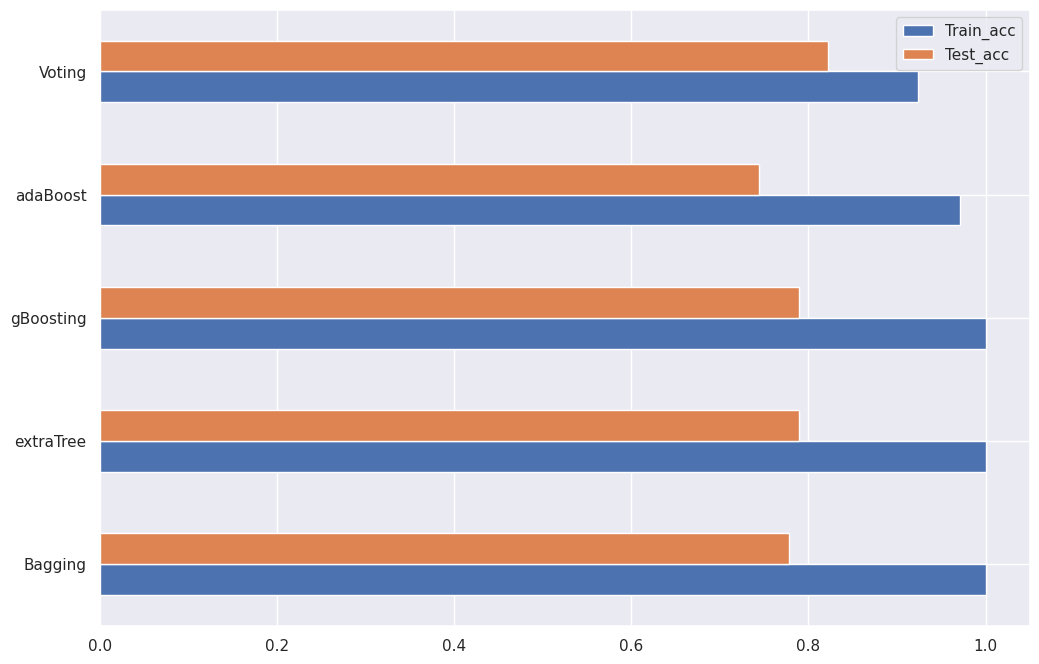

In [ ]:
scores = (model_selection)

scores.plot(kind='barh', figsize=(12, 8))

Model Voting memiliki akurasi test yang paling tinggi dibanding model ensemble lainnya

#Save Model

In [ ]:
pickle.dump(scaler, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb'))

pickle.dump(voting, open('voting.pkl','wb'))

VotingClassifier = pickle.load(open('voting.pkl','rb'))
